Block 1: Generating and Preparing the Synthetic Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples to generate
n_samples = 300

# Generate input features:
temperature = np.random.uniform(10, 40, n_samples)         # Temperature in °C
light_intensity = np.random.uniform(100, 1000, n_samples)    # Light Intensity in lux
photoperiod = np.random.uniform(4, 16, n_samples)            # Photoperiod (hours per day)

# Define parameters for the nonlinear relationship:
A = 50           # Maximum plant growth (e.g., in centimeters)
T_opt = 25       # Optimal temperature for growth
sigma_T = 5      # Spread factor for the temperature effect
k1 = 0.005       # Saturation coefficient for light intensity
k2 = 0.2         # Saturation coefficient for photoperiod

# Add Gaussian noise to simulate real-world variations
noise = np.random.normal(0, 2, n_samples)

# Define the nonlinear relationship:
# Plant_Growth = A * exp(-((Temperature - T_opt)^2 / (2 * sigma_T^2)))
#                * (1 - exp(-k1 * Light_Intensity))
#                * (1 - exp(-k2 * Photoperiod)) + noise
growth = (A * np.exp(-((temperature - T_opt)**2 / (2 * sigma_T**2))) *
          (1 - np.exp(-k1 * light_intensity)) *
          (1 - np.exp(-k2 * photoperiod)) + noise)

# Create a DataFrame to hold the data
data = pd.DataFrame({
    'Temperature': temperature,
    'Light_Intensity': light_intensity,
    'Photoperiod': photoperiod,
    'Plant_Growth': growth
})

# Display the first few rows of the dataset
print(data.head())

   Temperature  Light_Intensity  Photoperiod  Plant_Growth
0    21.236204       146.513549     6.027221     14.352773
1    38.521429       578.219168     7.343084     -1.563617
2    31.959818       586.571609     6.124126     14.536064
3    27.959755       673.686911     5.064430     25.433896
4    14.680559       753.482200     5.447630      2.807289


Block 2: Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      300 non-null    float64
 1   Light_Intensity  300 non-null    float64
 2   Photoperiod      300 non-null    float64
 3   Plant_Growth     300 non-null    float64
dtypes: float64(4)
memory usage: 9.5 KB
None
       Temperature  Light_Intensity  Photoperiod  Plant_Growth
count   300.000000       300.000000   300.000000    300.000000
mean     24.856138       559.748353     9.653067     14.261365
std       8.830216       272.331325     3.401130     12.780784
min      10.151848       109.753886     4.055584     -3.844276
25%      17.172424       324.653429     6.517198      3.430532
50%      25.351532       569.532495     9.434370     10.416523
75%      32.705788       796.007831    12.603860     24.201837
max      39.701616       999.745906    15.962491     45.799405


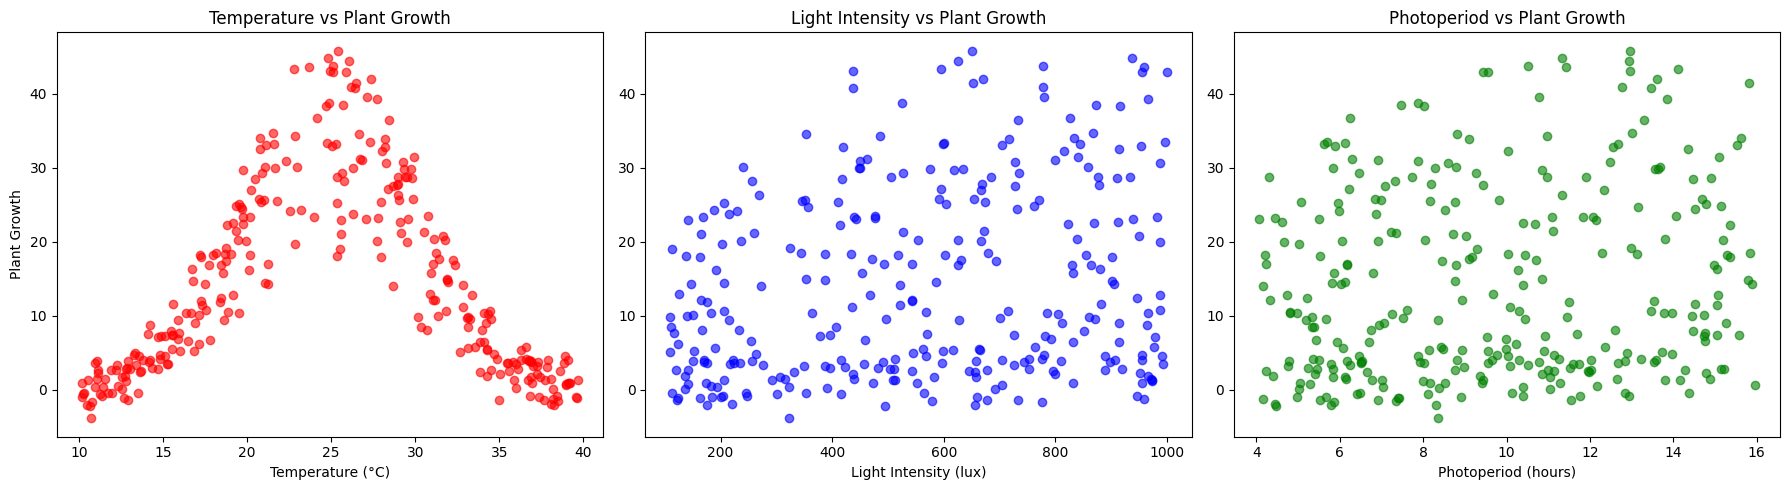

In [2]:
# Display general information and statistical summary of the dataset
print(data.info())
print(data.describe())

# Create scatter plots to visualize the relationships between each feature and plant growth
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(data['Temperature'], data['Plant_Growth'], color='red', alpha=0.6)
axes[0].set_title("Temperature vs Plant Growth")
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("Plant Growth")

axes[1].scatter(data['Light_Intensity'], data['Plant_Growth'], color='blue', alpha=0.6)
axes[1].set_title("Light Intensity vs Plant Growth")
axes[1].set_xlabel("Light Intensity (lux)")

axes[2].scatter(data['Photoperiod'], data['Plant_Growth'], color='green', alpha=0.6)
axes[2].set_title("Photoperiod vs Plant Growth")
axes[2].set_xlabel("Photoperiod (hours)")

plt.tight_layout()
plt.show()

Block 3: Splitting the Data and Preprocessing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features (X) and the target variable (y)
X = data[['Temperature', 'Light_Intensity', 'Photoperiod']]
y = data['Plant_Growth']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed!")

Data preprocessing completed!


Block 4: Implementing the Nonlinear Regression Model Using MLPRegressor

In [4]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a neural network regressor with one hidden layer of 50 neurons
mlp = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the model using the standardized training data
mlp.fit(X_train_scaled, y_train)

# Predict plant growth on the test data
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model's performance using Mean Squared Error (MSE) and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 18.667382476740105
R² Score: 0.8805693562450297


c:\Users\alire\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Block 5: Visualizing the Results

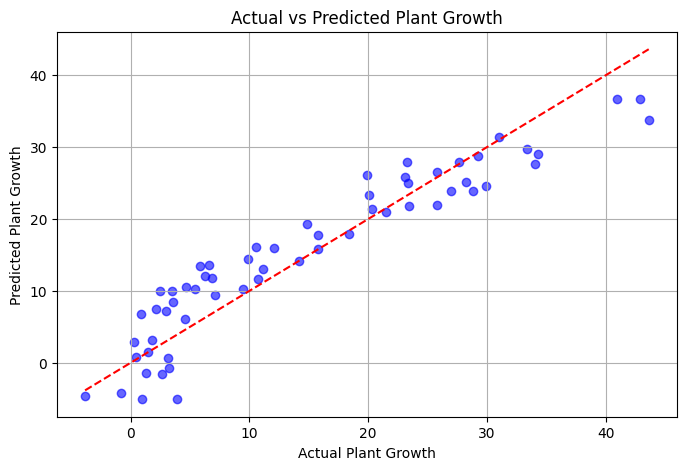

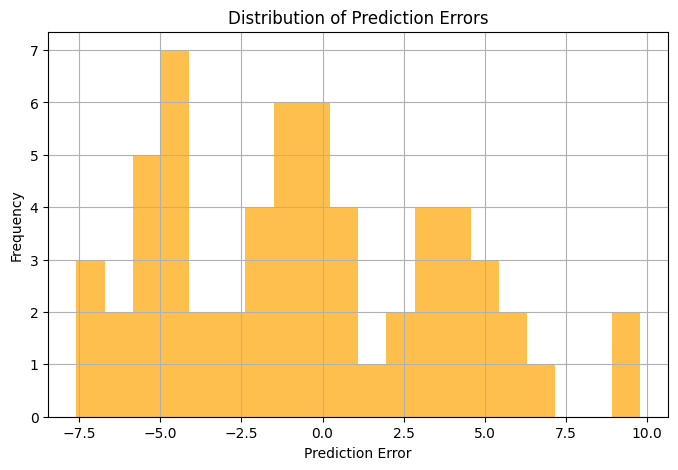

In [5]:
# Plot the comparison between actual and predicted plant growth values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Plant Growth")
plt.ylabel("Predicted Plant Growth")
plt.title("Actual vs Predicted Plant Growth")
plt.grid(True)
plt.show()

# Plot the distribution of prediction errors
errors = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.hist(errors, bins=20, color='orange', alpha=0.7)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.grid(True)
plt.show()

Block 6: 3D Plot for Temperature vs. Light Intensity (with Photoperiod fixed)

c:\Users\alire\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


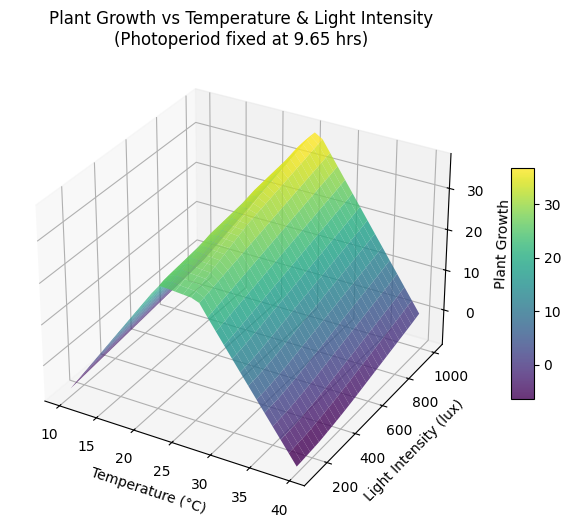

In [7]:
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# Assume that:
# - mlp is the trained MLPRegressor model.
# - scaler is the fitted StandardScaler.
# - data is the original DataFrame with columns 'Temperature', 'Light_Intensity', 'Photoperiod'.

# Fix Photoperiod at its mean value
mean_photo = np.mean(data['Photoperiod'])

# Create ranges for Temperature and Light Intensity
temp_range = np.linspace(data['Temperature'].min(), data['Temperature'].max(), 30)
light_range = np.linspace(data['Light_Intensity'].min(), data['Light_Intensity'].max(), 30)

# Generate a mesh grid for Temperature and Light Intensity
mesh_T, mesh_L = np.meshgrid(temp_range, light_range)

# Create the input array for the model: [Temperature, Light_Intensity, Photoperiod]
X_3d_1 = np.column_stack([
    mesh_T.ravel(),
    mesh_L.ravel(),
    np.full(mesh_T.size, mean_photo)  # Photoperiod fixed at its mean
])

# Scale the new inputs using the same scaler used during training
X_3d_1_scaled = scaler.transform(X_3d_1)

# Predict plant growth using the trained model
y_3d_pred_1 = mlp.predict(X_3d_1_scaled)
y_3d_pred_1 = y_3d_pred_1.reshape(mesh_T.shape)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf1 = ax.plot_surface(mesh_T, mesh_L, y_3d_pred_1, cmap='viridis', alpha=0.8)
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Light Intensity (lux)')
ax.set_zlabel('Plant Growth')
ax.set_title(f'Plant Growth vs Temperature & Light Intensity\n(Photoperiod fixed at {mean_photo:.2f} hrs)')
plt.colorbar(surf1, ax=ax, shrink=0.5, aspect=10)
plt.show()

Block 7: 3D Plot for Temperature vs. Photoperiod (with Light Intensity fixed)

c:\Users\alire\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


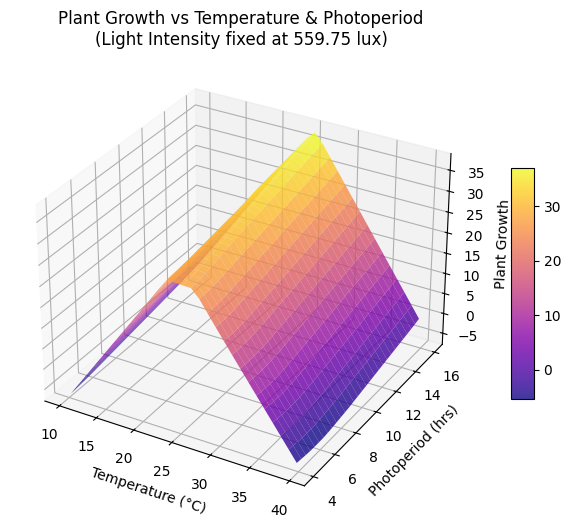

In [8]:
# Fix Light Intensity at its mean value
mean_light = np.mean(data['Light_Intensity'])

# Create ranges for Temperature and Photoperiod
temp_range = np.linspace(data['Temperature'].min(), data['Temperature'].max(), 30)
photo_range = np.linspace(data['Photoperiod'].min(), data['Photoperiod'].max(), 30)

# Generate a mesh grid for Temperature and Photoperiod
mesh_T2, mesh_P2 = np.meshgrid(temp_range, photo_range)

# Create the input array: [Temperature, Light_Intensity, Photoperiod]
X_3d_2 = np.column_stack([
    mesh_T2.ravel(),
    np.full(mesh_T2.size, mean_light),  # Light Intensity fixed at its mean
    mesh_P2.ravel()
])

# Scale the inputs
X_3d_2_scaled = scaler.transform(X_3d_2)

# Predict plant growth
y_3d_pred_2 = mlp.predict(X_3d_2_scaled)
y_3d_pred_2 = y_3d_pred_2.reshape(mesh_T2.shape)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf2 = ax.plot_surface(mesh_T2, mesh_P2, y_3d_pred_2, cmap='plasma', alpha=0.8)
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Photoperiod (hrs)')
ax.set_zlabel('Plant Growth')
ax.set_title(f'Plant Growth vs Temperature & Photoperiod\n(Light Intensity fixed at {mean_light:.2f} lux)')
plt.colorbar(surf2, ax=ax, shrink=0.5, aspect=10)
plt.show()

Block 8: 3D Plot for Light Intensity vs. Photoperiod (with Temperature fixed)

c:\Users\alire\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


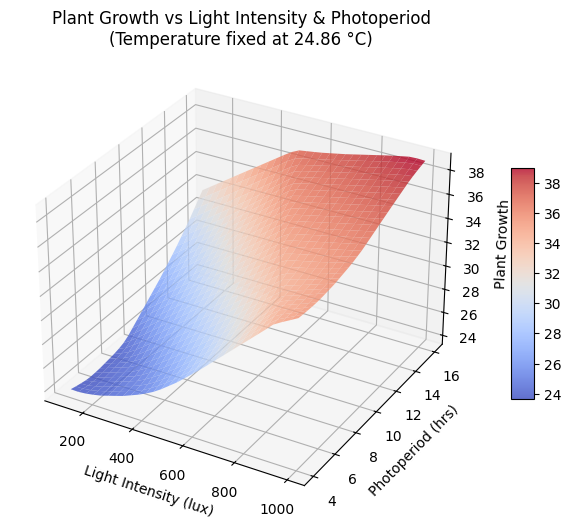

In [9]:
# Fix Temperature at its mean value
mean_temp = np.mean(data['Temperature'])

# Create ranges for Light Intensity and Photoperiod
light_range = np.linspace(data['Light_Intensity'].min(), data['Light_Intensity'].max(), 30)
photo_range = np.linspace(data['Photoperiod'].min(), data['Photoperiod'].max(), 30)

# Generate a mesh grid for Light Intensity and Photoperiod
mesh_L3, mesh_P3 = np.meshgrid(light_range, photo_range)

# Create the input array: [Temperature, Light_Intensity, Photoperiod]
X_3d_3 = np.column_stack([
    np.full(mesh_L3.size, mean_temp),  # Temperature fixed at its mean
    mesh_L3.ravel(),
    mesh_P3.ravel()
])

# Scale the inputs
X_3d_3_scaled = scaler.transform(X_3d_3)

# Predict plant growth
y_3d_pred_3 = mlp.predict(X_3d_3_scaled)
y_3d_pred_3 = y_3d_pred_3.reshape(mesh_L3.shape)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf3 = ax.plot_surface(mesh_L3, mesh_P3, y_3d_pred_3, cmap='coolwarm', alpha=0.8)
ax.set_xlabel('Light Intensity (lux)')
ax.set_ylabel('Photoperiod (hrs)')
ax.set_zlabel('Plant Growth')
ax.set_title(f'Plant Growth vs Light Intensity & Photoperiod\n(Temperature fixed at {mean_temp:.2f} °C)')
plt.colorbar(surf3, ax=ax, shrink=0.5, aspect=10)
plt.show()

Block 9: Testing the Model with a New Input

In [6]:
# Define a new sample input (e.g., Temperature = 30°C, Light Intensity = 600 lux, Photoperiod = 10 hours)
new_sample = np.array([[30, 600, 10]])
new_sample_scaled = scaler.transform(new_sample)

# Predict the plant growth for the new sample
predicted_growth = mlp.predict(new_sample_scaled)
print("Predicted Plant Growth for the new sample:", predicted_growth[0])

Predicted Plant Growth for the new sample: 22.473496439433898


c:\Users\alire\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
